In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\pyj\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
#정상 빈도수 x (성공)
import os
import pandas as pd

txt = []
bei = []

path = "C:\KISA-CISC2017-Malware-2nd[14]//" + '0//'
files = os.listdir(path)
files_list = len(files)
type(files[0])
    
for file in files: 
    f = open(path + file, 'r')
   
    
    while True:
        line = f.readline().strip()
        if not line:
            break
        txt.append(line)    

    bei.append(txt)
    txt = []
f.close()


# print(bei)
bei

#list를 DataFrame으로 
bei_df = pd.DataFrame()
bei_df['function'] = bei
bei_df['target'] = [0]*files_list
bei_df



,function,target
0,"[GetSystemTimeAsFileTime, LdrLoadDll, LdrGetPr...",0
1,"[GetSystemInfo, LdrGetDllHandle, LdrGetProcedu...",0
2,"[GetSystemTimeAsFileTime, NtAllocateVirtualMem...",0
3,"[LdrGetDllHandle, LdrGetProcedureAddress, LdrG...",0
4,"[GetSystemTimeAsFileTime, GetSystemTimeAsFileT...",0
...,...,...
1711,"[GetSystemTimeAsFileTime, LdrLoadDll, LdrGetPr...",0
1712,"[GetSystemTimeAsFileTime, LdrLoadDll, LdrGetPr...",0
1713,"[GetSystemTimeAsFileTime, LdrLoadDll, LdrGetPr...",0
1714,"[GetSystemInfo, LdrGetDllHandle, LdrGetProcedu...",0


In [2]:
# 악성 빈도수x
import os
import pandas as pd

txt2 = []
mal = []

path = "C:\KISA-CISC2017-Malware-2nd[14]//" + '1//'
files2 = os.listdir(path)
files_list2  = len(files2)
type(files[0])
    
for file in files2: 
    f = open(path + file, 'r')
   
    
    while True:
        line2 = f.readline().strip()
        if not line2:
            break
        txt2.append(line2)    

    mal.append(txt2)
    txt2 = []
f.close()

#list를 DataFrame으로 
mal_df = pd.DataFrame()
mal_df['function'] = mal
mal_df['target'] = [1]*files_list2
mal_df



,function,target
0,"[NtAllocateVirtualMemory, NtFreeVirtualMemory,...",1
1,"[IsDebuggerPresent, SetStdHandle, SetStdHandle...",1
2,"[LdrLoadDll, LdrGetProcedureAddress, LdrGetPro...",1
3,"[LdrGetProcedureAddress, LdrGetProcedureAddres...",1
4,"[IsDebuggerPresent, SetStdHandle, SetStdHandle...",1
...,...,...
4989,"[NtAllocateVirtualMemory, NtFreeVirtualMemory,...",1
4990,"[LookupPrivilegeValueW, NtClose, SetUnhandledE...",1
4991,"[GetSystemTimeAsFileTime, LdrGetDllHandle, Ldr...",1
4992,"[GetSystemDirectoryA, NtAllocateVirtualMemory,...",1


In [3]:
# 정상과 악성 데이터 프레임 합치기
api_df = pd.concat([bei_df, mal_df], ignore_index=True)
api_df

,function,target
0,"[GetSystemTimeAsFileTime, LdrLoadDll, LdrGetPr...",0
1,"[GetSystemInfo, LdrGetDllHandle, LdrGetProcedu...",0
2,"[GetSystemTimeAsFileTime, NtAllocateVirtualMem...",0
3,"[LdrGetDllHandle, LdrGetProcedureAddress, LdrG...",0
4,"[GetSystemTimeAsFileTime, GetSystemTimeAsFileT...",0
...,...,...
6705,"[NtAllocateVirtualMemory, NtFreeVirtualMemory,...",1
6706,"[LookupPrivilegeValueW, NtClose, SetUnhandledE...",1
6707,"[GetSystemTimeAsFileTime, LdrGetDllHandle, Ldr...",1
6708,"[GetSystemDirectoryA, NtAllocateVirtualMemory,...",1


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\pyj\anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

A = api_df['function'].to_list()


tokenizer = Tokenizer()
tokenizer.fit_on_texts(A)
word_dic = tokenizer.word_index
print(word_dic)



{'ntfreevirtualmemory': 1, 'getkeystate': 2, 'ntwritefile': 3, 'getasynckeystate': 4, 'ntallocatevirtualmemory': 5, 'ntreadfile': 6, 'setfilepointer': 7, 'getfilesize': 8, 'ldrgetprocedureaddress': 9, 'ntclose': 10, 'crypthashdata': 11, 'getsystemmetrics': 12, 'readprocessmemory': 13, 'ntdelayexecution': 14, 'ntquerysysteminformation': 15, 'regqueryvalueexw': 16, 'getsystemtimeasfiletime': 17, 'regclosekey': 18, 'internetreadfile': 19, 'regopenkeyexw': 20, 'cryptcreatehash': 21, 'enumwindows': 22, 'getfiletype': 23, 'process32nextw': 24, 'cryptdecodeobjectex': 25, 'getfileattributesw': 26, 'copyfileexw': 27, 'ldrgetdllhandle': 28, 'ntquerydirectoryfile': 29, 'findwindowexw': 30, '__exception__': 31, 'ntcreatefile': 32, 'removedirectoryw': 33, 'findfirstfileexw': 34, 'ntqueryvaluekey': 35, 'ldrloaddll': 36, 'findresourceexw': 37, 'findwindowexa': 38, 'ntquerykey': 39, 'getusernamea': 40, 'regopenkeyexa': 41, 'ntopenkeyex': 42, 'ntopenfile': 43, 'seterrormode': 44, 'ntprotectvirtualmemor

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sequences = tokenizer.texts_to_sequences(A)
print(sequences[:20])

[[17, 36, 9, 36, 36, 9, 9, 36, 9, 36, 36, 9, 9, 9, 36, 9, 28, 9, 9, 9, 28, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 122, 28, 9, 36, 9, 20, 117, 20, 20, 20, 20, 36, 9, 148, 9, 153, 9, 36, 9, 9, 71, 32, 68, 52, 10, 10, 9, 9, 86, 9, 9, 9, 9, 9, 9, 9, 9, 77, 9, 32, 28, 9, 20, 26, 26, 91, 9, 10, 36, 36, 28, 28, 64, 64, 10, 10, 10, 10, 10, 10, 10, 10, 69, 10, 10, 10, 65, 46, 35, 10, 10, 10, 10, 64], [80, 28, 9, 9, 9, 20, 20, 20, 20, 10, 110, 110, 110, 110, 72, 5, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 28, 9, 28, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 20, 16, 16, 18, 28, 9, 9, 9, 9, 28, 44, 28, 9, 36, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 44, 9, 9, 12, 12, 37, 49, 37, 49, 37, 49, 37, 49, 37, 49, 37, 49, 37, 49, 37, 49, 37, 49, 37, 49, 37, 49, 37, 49, 37, 49, 37, 49, 9, 181, 37, 49, 37, 49, 10, 10, 5, 12, 12, 

In [7]:
api_df['function'] = sequences
api_df

,function,target
0,"[17, 36, 9, 36, 36, 9, 9, 36, 9, 36, 36, 9, 9,...",0
1,"[80, 28, 9, 9, 9, 20, 20, 20, 20, 10, 110, 110...",0
2,"[17, 5, 1, 5, 28, 9, 9, 9, 9, 28, 9, 28, 9, 28...",0
3,"[28, 9, 9, 9, 5, 5, 62, 62, 10, 62, 62, 62, 62...",0
4,"[17, 17, 77, 17, 42, 39, 42, 36, 9, 20, 9, 84,...",0
...,...,...
6705,"[5, 1, 5, 28, 28, 28, 28, 28, 28, 28, 28, 152,...",1
6706,"[184, 10, 122, 77, 139, 124, 14, 179, 144, 32,...",1
6707,"[17, 28, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9...",1
6708,"[98, 5, 5, 92, 129, 35, 118, 10, 77, 1, 1, 32,...",1


In [8]:
# n-gram

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

text = api_df['function'].to_list()
a = []
b = []

for j in text:
    two_gram = zip(j, j[1:])
    for i in two_gram:
        a.append(str(i[0]).zfill(3)+str(i[1]).zfill(3))
    result = " ".join(a)
    b.append(result)
    a = []
    


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(b)
tfidf_vectorizer.vocabulary_
sorted(tfidf_vectorizer.vocabulary_.items())

[('001001', 0),
 ('001002', 1),
 ('001003', 2),
 ('001004', 3),
 ('001005', 4),
 ('001006', 5),
 ('001007', 6),
 ('001008', 7),
 ('001009', 8),
 ('001010', 9),
 ('001011', 10),
 ('001012', 11),
 ('001013', 12),
 ('001014', 13),
 ('001015', 14),
 ('001016', 15),
 ('001017', 16),
 ('001018', 17),
 ('001019', 18),
 ('001020', 19),
 ('001021', 20),
 ('001022', 21),
 ('001023', 22),
 ('001024', 23),
 ('001025', 24),
 ('001026', 25),
 ('001028', 26),
 ('001029', 27),
 ('001031', 28),
 ('001032', 29),
 ('001033', 30),
 ('001034', 31),
 ('001035', 32),
 ('001036', 33),
 ('001037', 34),
 ('001038', 35),
 ('001039', 36),
 ('001040', 37),
 ('001041', 38),
 ('001042', 39),
 ('001043', 40),
 ('001044', 41),
 ('001045', 42),
 ('001046', 43),
 ('001047', 44),
 ('001048', 45),
 ('001049', 46),
 ('001050', 47),
 ('001051', 48),
 ('001052', 49),
 ('001053', 50),
 ('001054', 51),
 ('001055', 52),
 ('001056', 53),
 ('001057', 54),
 ('001058', 55),
 ('001059', 56),
 ('001060', 57),
 ('001062', 58),
 ('0010

In [10]:
#tfidf_wm(array 처리한 거)

tfidf_wm = tfidf_vectorizer.fit_transform(b).toarray()
tfidf_wm


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05363258, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00107324, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [103]:
#tfidf_lr(array 처리안한 거 -> logistic regression 사용)
tfidf_nb = tfidf_vectorizer.fit_transform(b)
# tfidf_nb
tfidf_nb

<6710x20948 sparse matrix of type '<class 'numpy.float64'>'
	with 1838856 stored elements in Compressed Sparse Row format>

In [ ]:
# - 끝 - 

In [ ]:
# NB

In [104]:
targets = list(api_df['target'])

In [105]:
from sklearn.model_selection import train_test_split
import numpy as np

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X = tfidf_nb
y = np.array(targets)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT, random_state = RANDOM_SEED)

In [109]:
X_train.shape

(5368, 20948)

In [110]:
# NB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB()
y_pred = nb.fit(X_train, y_train).predict(X_test)
#print(y_pred)

print("Accuracy: ", accuracy_score(y_pred, y_test))

Accuracy:  0.7809239940387481


In [111]:
# NB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB()
y_pred = nb.fit(X_train, y_train).predict(X_test)
#print(y_pred)

print("Accuracy: ", accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

Accuracy:  0.7809239940387481
f1 score:  0.86875


In [112]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV

params = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

nb_params = RandomizedSearchCV(nb, param_distributions = params, scoring='accuracy', n_iter = 10, cv=5, verbose = 3)
nb_params.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(nb_params.best_params_,nb_params.best_score_))

C:\Users\pyj\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....................................alpha=0.001; total time=   0.0s
[CV 2/5] END ....................................alpha=0.001; total time=   0.0s
[CV 3/5] END ....................................alpha=0.001; total time=   0.0s
[CV 4/5] END ....................................alpha=0.001; total time=   0.0s
[CV 5/5] END ....................................alpha=0.001; total time=   0.0s
[CV 1/5] END ....................................alpha=0.005; total time=   0.0s
[CV 2/5] END ....................................alpha=0.005; total time=   0.0s
[CV 3/5] END ....................................alpha=0.005; total time=   0.0s
[CV 4/5] END ....................................alpha=0.005; total time=   0.0s
[CV 5/5] END ....................................alpha=0.005; total time=   0.0s
[CV 1/5] END .....................................alpha=0.01; total time=   0.0s
[CV 2/5] END ....................................

In [113]:
# NB(최종)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB(alpha= 0.001, class_prior= None, fit_prior=True)
y_pred = nb.fit(X_train, y_train).predict(X_test)
#print(y_pred)

print("Accuracy: ", accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

Accuracy:  0.8912071535022354
f1 score:  0.9266331658291457


In [88]:
pip install prob

  Created wheel for prob: filename=prob-0.0.2-py3-none-any.whl size=2311 sha256=f0cc0b99088cc35d3f34443eacde637dbd20b388bb929ce27a90bc0bf6045d8a
  Stored in directory: c:\users\pyj\appdata\local\pip\cache\wheels\56\24\86\a6df2e13453b5082e7300cc4378616f65a161e8eb6dec92d98
Successfully built prob
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\pyj\anaconda3\python.exe -m pip install --upgrade pip' command.


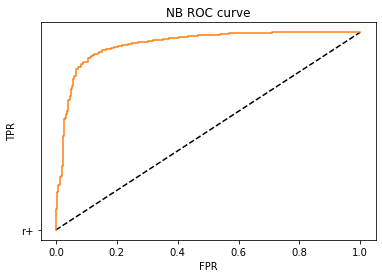

In [114]:
# ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='NB')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('NB ROC curve')
plt.show()

<AxesSubplot:>

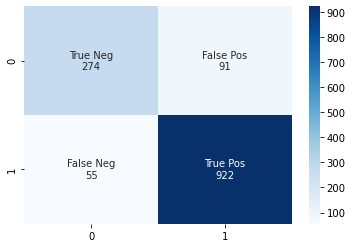

In [115]:
# 평가 지표

import seaborn as sns

from sklearn.metrics import confusion_matrix

nb_matrix = confusion_matrix(y_test, y_pred)
# sns.heatmap(svm_matrix/np.sum(svm_matrix), annot=True, 
#             fmt='.2%', cmap='Blues')

labels = ['True Neg','False Pos', 'False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
#sns.heatmap(svm_matrix, annot=labels, fmt='', cmap='Blues')

group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                nb_matrix.flatten()]
#group_percentages = ["{0:.2%}".format(value) for value in
#                    svm_matrix.flatten()/np.sum(svm_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(nb_matrix, annot=labels, fmt='', cmap='Blues')

#print(svm_matrix)

In [75]:
pip install yellobrick

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement yellobrick (from versions: none)
ERROR: No matching distribution found for yellobrick
You should consider upgrading via the 'C:\Users\pyj\anaconda3\python.exe -m pip install --upgrade pip' command.


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       365
           1       0.95      0.95      0.95       977

    accuracy                           0.93      1342
   macro avg       0.91      0.91      0.91      1342
weighted avg       0.93      0.93      0.93      1342



In [20]:
# f1 score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import f1_score

pred = svm_params.predict(X_test)
f1 = f1_score(y_test, pred)

print('Accuacy Score: ', svm_params.best_score_)
print('ROC AUC Score: ', roc_auc_score(y_test, pred))ㅋ

Accuacy Score:  0.9230633060338318
ROC AUC Score:  0.9119095357608558
f1 score:  0.9513070220399795
